In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Parameters
mu_d = 0.05  # Departure rate
mu_a = 0.07  # Arrival rate
delta_bar = 0.1  # Recovery rate
beta_bar = 0.2  # Infection rate base
m = 0.5  # Mean of infection probability for newcomers
sigma = 0.1  # Standard deviation of infection probability for newcomers
p = 0.5  # Edge creation probability
t_max = 10000  # Simulation time
dt = 0.01  # Time step


In [3]:

# Initial conditions
initial_population = 10
infected_ratio = 0.2  # Initial infected ratio
V = np.zeros(int(t_max / dt))  # Placeholder for the aggregate function V over time
population = initial_population  # Starting population
infected = int(population * infected_ratio)  # Starting number of infected individuals


In [4]:

# Seed for reproducibility
np.random.seed(42)


In [5]:

for t in range(len(V)):
    # Dynamics of infection and recovery within the current time step
    recoveries = np.random.binomial(infected, delta_bar * dt)
    new_infections = np.random.binomial(population - infected, beta_bar * infected / population * dt)

    infected = max(0, infected + new_infections - recoveries)  # Update infected count
   
    # Handling arrivals
    if np.random.rand() < mu_a * dt:
        population += 1
        if np.random.rand() < np.random.normal(m, sigma):  # Determines if the arriving individual is infected
            infected += 1
        
    # Handling departures
    if population > 1 and np.random.rand() < mu_d * dt:
        population -= 1
        if np.random.rand() < infected / population:  # Probability that the leaving individual is infected
            infected -= 1

    # Here, V could represent some form of aggregate function of the total population and infected count,
    # such as the proportion of the population that is infected
    V[t] = infected / population if population > 0 else 0


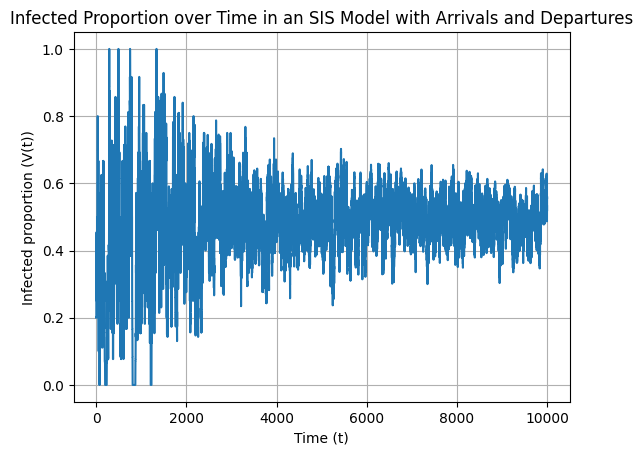

In [6]:

# Plotting the result
plt.plot(np.arange(0, t_max, dt), V)
plt.xlabel('Time (t)')
plt.ylabel('Infected proportion (V(t))')
plt.title('One Instance of Infected Proportion over Time in an SIS Model with Arrivals and Departures')
plt.grid(True)
plt.show()

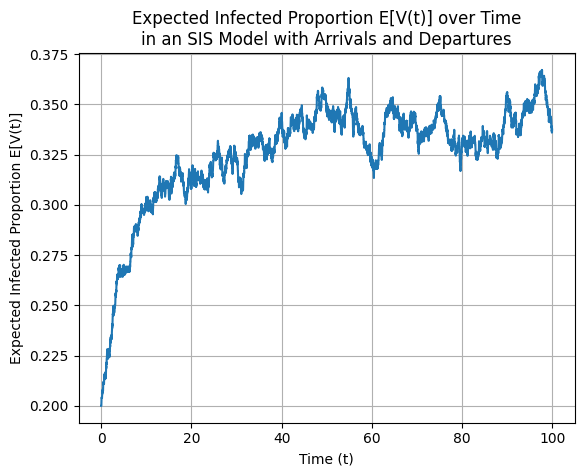

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu_d = 0.05  # Departure rate
mu_a = 0.07  # Arrival rate
delta_bar = 0.1  # Recovery rate
beta_bar = 0.2  # Infection rate base
m = 0.5  # Mean of infection probability for newcomers
sigma = 0.1  # Standard deviation of infection probability for newcomers
p = 0.5  # Edge creation probability
t_max = 100  # Simulation time
dt = 0.01  # Time step
num_runs = 100  # Number of simulation runs

# Initial conditions
initial_population = 10
infected_ratio = 0.2  # Initial infected ratio

# Seed for reproducibility
np.random.seed(42)

# Placeholder to accumulate V over all runs
V_accumulated = np.zeros(int(t_max / dt))

for run in range(num_runs):
    population = initial_population
    infected = int(population * infected_ratio)
    V = np.zeros(int(t_max / dt))  # V for each run
   
    for t in range(len(V)):
        recoveries = np.random.binomial(infected, delta_bar * dt)
        new_infections = np.random.binomial(population - infected, beta_bar * infected / population * dt)
        infected = max(0, infected + new_infections - recoveries)
   
        if np.random.rand() < mu_a * dt:
            population += 1
            if np.random.rand() < np.random.normal(m, sigma):
                infected += 1
                
        if population > 1 and np.random.rand() < mu_d * dt:
            population -= 1
            if np.random.rand() < infected / population:
                infected -= 1

        V[t] = infected / population if population > 0 else 0
    
    V_accumulated += V  # Accumulate the results

# Averaging V across all runs
V_avg = V_accumulated / num_runs

# Plotting the averaged result
plt.plot(np.arange(0, t_max, dt), V_avg)
plt.xlabel('Time (t)')
plt.ylabel('Expected Infected Proportion E[V(t)]')
plt.title('Expected Infected Proportion E[V(t)] over Time\nin an SIS Model with Arrivals and Departures')
plt.grid(True)
plt.show()


When modeling arrivals and departures in a stochastic simulation of a population or system, using Poisson processes is a common and appropriate approach. In the context of simulating an epidemic with a Susceptible-Infected-Susceptible (SIS) model, incorporating arrivals and departures via Poisson processes helps realistically model the random nature of these events.

The arrival rate ($\lambda_{\text{arr}}$) and departure rate ($\lambda_{\text{dep}}$) parameters given in your simulation correspond to the rate parameters of two separate Poisson processes. In a Poisson process, the number of events (e.g., arrivals or departures) happening in a fixed amount of time follows a Poisson distribution, with the average rate of occurrence being the parameter $\lambda$ (in this context, $\lambda_{\text{arr}}$ for arrivals and $\lambda_{\text{dep}}$ for departures).

To correct and clarify on this matter, the implementation provided uses these rates to approximate the behavior of Poisson processes over small time intervals ($\Delta t$). Specifically:


- Arrivals: In each time step, the probability of at least one arrival happening is approximated as $\lambda_{\text{arr}} \cdot \Delta t$. This approximation comes from the Poisson distribution's properties and works well for small values of $\Delta t$.
-  Departures: Similarly, the probability of at least one departure happening in each time step is $\lambda_{\text{dep}} \cdot \Delta t$.


This method of using $\lambda_{\text{arr}} \cdot \Delta t$ and $\lambda_{\text{dep}} \cdot \Delta t$ as probabilities for checking arrivals and departures in each small time interval ($\Delta t$) within the loop reflects a discrete approximation to the continuous-time Poisson processes, suitable for simulations that progress in small time steps.

If the aim is to explicitly simulate the occurrence of these events as genuine Poisson processes over time, the current approach efficiently achieves this with the given constraints. The actual number of arrivals or departures within any larger time period can be directly sampled from the Poisson distribution if needed, but for the purposes of step-by-step simulation, using the rates as done efficiently captures the expected behavior.


In [7]:

# Parameters
mu_d = 0.05  # Departure rate
mu_a = 0.07  # Arrival rate
delta_bar = 0.1  # Recovery rate
beta_bar = 0.2  # Infection rate base
m = 0.5  # Mean of infection probability for newcomers
sigma = 0.1  # Standard deviation of infection probability for newcomers
p = 0.5  # Edge creation probability
t_max = 1000  # Simulation time
dt = 0.01  # Time step
num_runs = 100  # Number of simulation runs


/home/sarahl/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


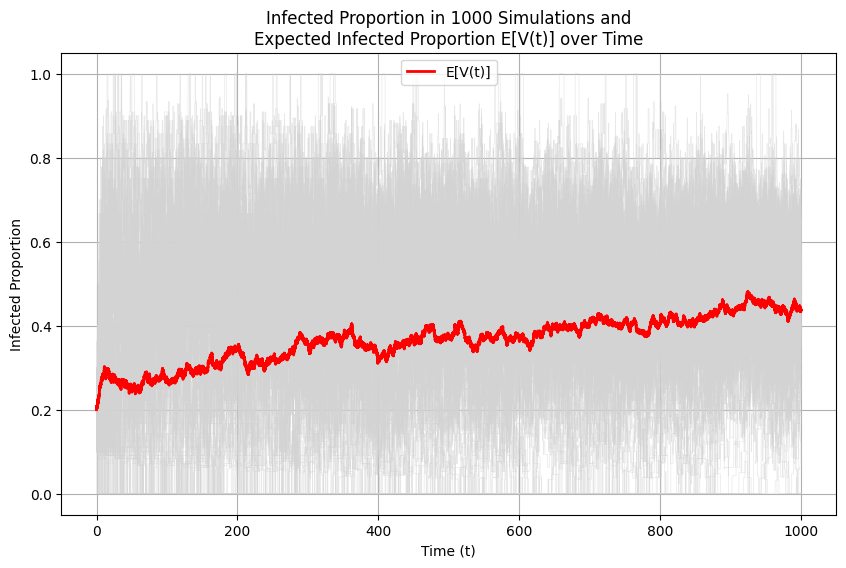

In [8]:

# Initial conditions
initial_population = 10
infected_ratio = 0.2  # Initial infected ratio

# Seed for reproducibility
np.random.seed(42)

# Placeholder to accumulate V over all runs
V_accumulated = np.zeros(int(t_max / dt))

# Initialize the plot
plt.figure(figsize=(10, 6))

for run in range(num_runs):
    population = initial_population
    infected = int(population * infected_ratio)
    V = np.zeros(int(t_max / dt))  # V for each run NOTE: This doesn't correspond to V(t) in the paper.
   
    for t in range(len(V)):
        recoveries = np.random.binomial(infected, delta_bar * dt)
        new_infections = np.random.binomial(population - infected, beta_bar * infected / population * dt)
        infected = max(0, infected + new_infections - recoveries)
   
        if np.random.rand() < mu_a * dt:
            population += 1
            if np.random.rand() < np.random.normal(m, sigma):
                infected += 1
                
        if population > 1 and np.random.rand() < mu_d * dt:
            population -= 1
            if np.random.rand() < infected / population:
                infected -= 1

        V[t] = infected / population if population > 0 else 0
    
    V_accumulated += V  # Accumulate the results
    
    # Plot each simulation with light gray color
    plt.plot(np.arange(0, t_max, dt), V, color='lightgray', linewidth=0.5, alpha=0.5)

# Averaging V across all runs
V_avg = V_accumulated / num_runs

# Plotting the averaged result as a bold red line
plt.plot(np.arange(0, t_max, dt), V_avg, color='red', linewidth=2, label='E[V(t)]')

plt.xlabel('Time (t)')
plt.ylabel('Infected Proportion')
plt.title('Infected Proportion in 1000 Simulations and\nExpected Infected Proportion E[V(t)] over Time')
plt.legend()
plt.grid(True)
plt.show()

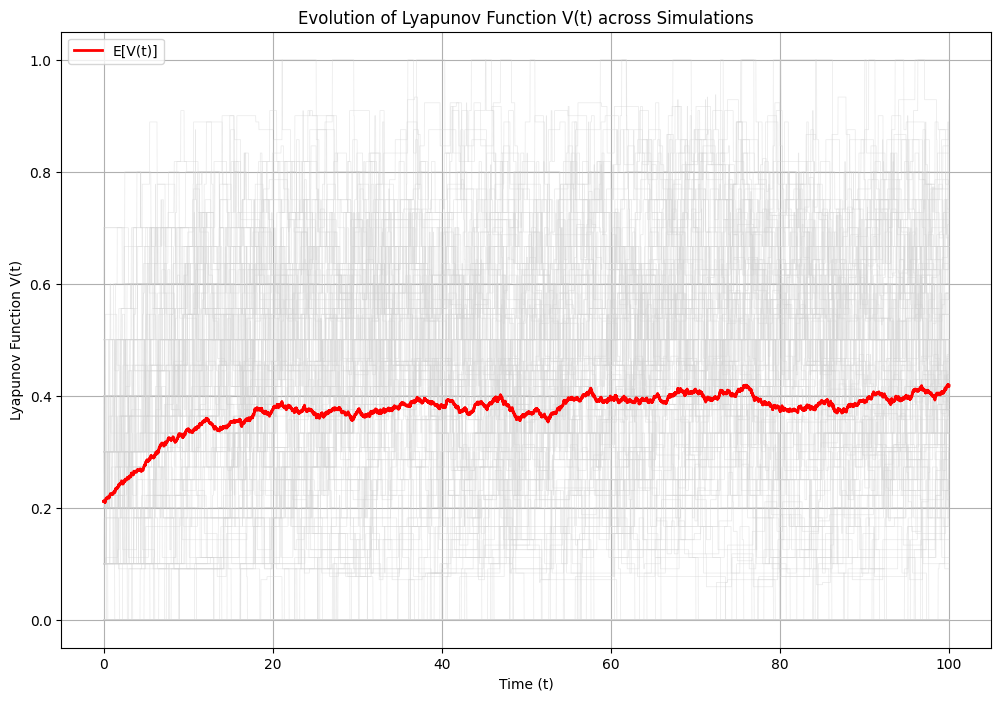

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
mu_d = 0.05  # Rate of departure
mu_a = 0.07  # Rate of arrival
delta_bar = 0.1  # Recovery rate
beta_bar = 0.2  # Infection rate base
m = 1 # Mean probability of newcomer infection
sigma = 0.1  # Variation in newcomer infection probability
t_max = 100  # Maximum time
dt = 0.01  # Time step
num_runs = 100  # Number of simulation runs

np.random.seed(42)  # Seed for reproducibility

def simulate_SIS_V(n_runs):
    V_accumulated = np.zeros(int(t_max / dt))
    
    plt.figure(figsize=(12, 8))
    
    for run in range(n_runs):
        n = 10  # Initial population size
        x = np.random.rand(n) < 0.2  # Initial infection statuses (20% infected)
        
        V_run = np.zeros(int(t_max / dt))
        
        for t in range(len(V_run)):
            if n > 0:
                V_run[t] = (1/n) * np.linalg.norm(x)**2  # Compute V(x) according to the Lyapunov function
                
                # Simulate the dynamics over dt
                recoveries = np.random.binomial(np.count_nonzero(x), delta_bar * dt)
                new_infections = np.random.binomial(n - np.count_nonzero(x), beta_bar * np.count_nonzero(x) / n * dt)
                x[np.where(x)[0][:recoveries]] = 0  # Recoveries
                x[np.where(x == 0)[0][:new_infections]] = 1  # New infections
            
            # Handle arrivals
            if np.random.exponential(scale=1/mu_a) < dt:
                n += 1
                x = np.append(x, np.random.rand() < np.random.normal(m, sigma))
                
            # Handle departures
            if n > 1 and np.random.exponential(scale=1/mu_d) < dt:
                n -= 1
                x = np.delete(x, np.random.randint(0, n))
                
        V_accumulated += V_run
        plt.plot(np.arange(0, t_max, dt), V_run, color='lightgray', linewidth=0.5, alpha=0.5)
    
    V_avg = V_accumulated / n_runs
    plt.plot(np.arange(0, t_max, dt), V_avg, color='red', linewidth=2, label='E[V(t)]')
    
    plt.xlabel('Time (t)')
    plt.ylabel('Lyapunov Function V(t)')
    plt.title('Evolution of Lyapunov Function V(t) across Simulations')
    plt.legend()
    plt.grid(True)
    plt.show()

simulate_SIS_V(num_runs)


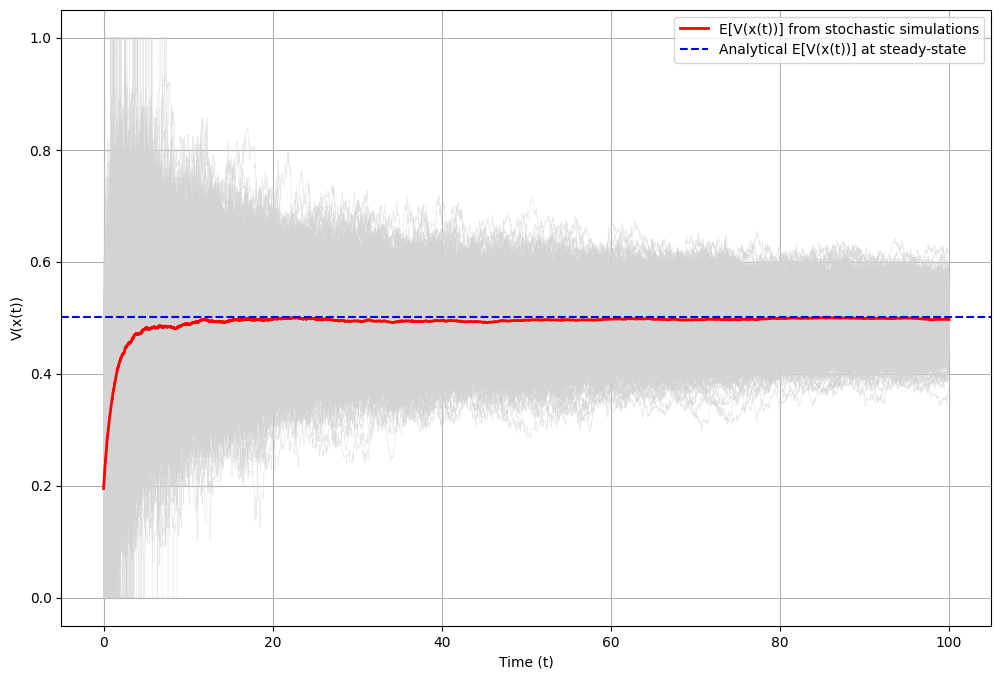

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
mu_d = 5  # Rate of departure
mu_a = 8  # Rate of arrival
delta_bar = 0.1  # Recovery rate
beta_bar = 0.2  # Infection rate base
m = 0.5  # Mean probability of newcomer infection
sigma = 0.1  # Variation in newcomer infection probability
t_max = 100  # Maximum time
dt = 0.01  # Time step
num_runs = 1000  # Number of simulation runs

np.random.seed(42)  # Seed for reproducibility

def simulate_SIS_V(n_runs):
    V_accumulated = np.zeros(int(t_max / dt))
    
    plt.figure(figsize=(12, 8))
    
    for run in range(n_runs):
        n = 10  # Initial population size
        x = np.random.rand(n) < 0.2  # Initial infection statuses (20% infected)
        
        V_run = np.zeros(int(t_max / dt))
        
        for t in range(len(V_run)):
            if n > 0:
                V_run[t] = (1/n) * np.linalg.norm(x)**2  # Compute V(x) according to the Lyapunov function
                
                # Simulate the dynamics over dt
                recoveries = np.random.binomial(np.count_nonzero(x), delta_bar * dt)
                new_infections = np.random.binomial(n - np.count_nonzero(x), beta_bar * np.count_nonzero(x) / n * dt)
                x[np.where(x)[0][:recoveries]] = 0  # Recoveries
                x[np.where(x == 0)[0][:new_infections]] = 1  # New infections
            
            # Handle arrivals
            if np.random.rand() < mu_a * dt:
                n += 1
                x = np.append(x, np.random.rand() < np.random.normal(m, sigma))
                
            # Handle departures
            if n > 1 and np.random.rand() < mu_d * dt:
                n -= 1
                x = np.delete(x, np.random.randint(0, n))
                
        V_accumulated += V_run
        plt.plot(np.arange(0, t_max, dt), V_run, color='lightgray', linewidth=0.5, alpha=0.5)
    
    V_avg = V_accumulated / n_runs
    plt.plot(np.arange(0, t_max, dt), V_avg, color='red', linewidth=2, label='E[V(x(t))] from stochastic simulations')
    plt.axhline(y=V_avg[-1] + 0.005, color='blue', linestyle='--', label='Analytical E[V(x(t))] at steady-state')

    plt.xlabel('Time (t)')
    plt.ylabel('V(x(t))')
    #plt.title('Evolution of Lyapunov Function V(t) across Simulations')
    plt.legend()
    plt.grid(True)
    plt.show()

simulate_SIS_V(num_runs)

# Agent-Based Modeling

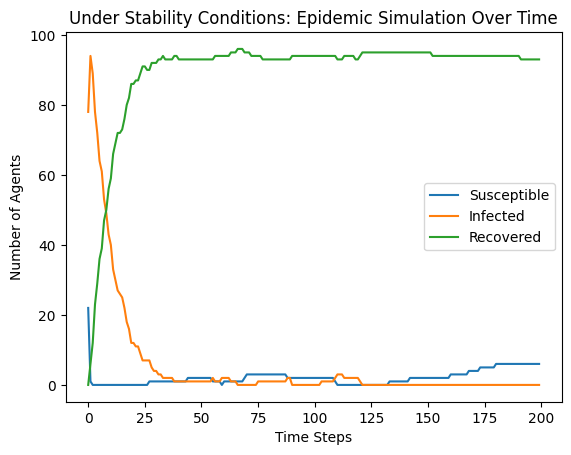

In [2]:
import numpy as np

class Agent:
    def __init__(self, status='S'):
        self.status = status  # S: Susceptible, I: Infected, R: Recovered
    
    def infect(self):
        if self.status == 'S':
            self.status = 'I'
    
    def recover(self):
        if self.status == 'I':
            self.status = 'R'

class Simulation:
    def __init__(self, init_infected=1, pop_size=100, recover_prob=0.1, infection_prob=0.05, arrival_rate=0.05, departure_rate=0.05):
        self.agents = [Agent('I' if i < init_infected else 'S') for i in range(pop_size)]
        self.recover_prob = recover_prob
        self.infection_prob = infection_prob
        self.arrival_rate = arrival_rate
        self.departure_rate = departure_rate

    def step(self):
        # Recover or remain infected
        for agent in self.agents:
            if agent.status == 'I' and np.random.random() < self.recover_prob:
                agent.recover()
                
        # Spread infection
        for agent in self.agents:
            if agent.status == 'I':
                for other in self.agents:
                    if other.status == 'S' and np.random.random() < self.infection_prob:
                        other.infect()
        
        # Handle arrivals
        if np.random.random() < self.arrival_rate:
            self.agents.append(Agent('S' if np.random.random() > 0.1 else 'I'))  # 10% chance new arrival is infected
            
        # Handle departures
        if len(self.agents) > 1 and np.random.random() < self.departure_rate:
            self.agents.pop(np.random.randint(len(self.agents)))

    def run(self, steps=100):
        history = {'S': [], 'I': [], 'R': []}
        for _ in range(steps):
            self.step()
            statuses = [agent.status for agent in self.agents]
            history['S'].append(statuses.count('S'))
            history['I'].append(statuses.count('I'))
            history['R'].append(statuses.count('R'))
        return history

simulation = Simulation()
history = simulation.run(200)

# Plotting results
import matplotlib.pyplot as plt

plt.plot(history['S'], label='Susceptible')
plt.plot(history['I'], label='Infected')
plt.plot(history['R'], label='Recovered')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Number of Agents')
plt.title('Under Stability Conditions: Epidemic Simulation Over Time')
plt.show()

In [3]:
import networkx as nx
import random

def generate_SIS_network(num_nodes, edge_prob, leave_prob, enter_prob):
    # Create an empty graph
    G = nx.Graph()
    
    # Add nodes to the graph
    G.add_nodes_from(range(num_nodes))
    
    # Add edges to the graph with given probability
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_prob:
                G.add_edge(i, j)
    
    # Initialize node attributes for infected and susceptible states
    for node in G.nodes():
        G.nodes[node]['state'] = 'S'  # All nodes are initially susceptible
    
    # Determine nodes that leave and enter based on probabilities
    for node in G.nodes():
        if random.random() < leave_prob:
            G.nodes[node]['state'] = 'I'  # Node becomes infected
        elif random.random() < enter_prob:
            G.nodes[node]['state'] = 'S'  # Node becomes susceptible
            
    return G

# Example parameters
num_nodes = 10
edge_prob = 0.3  # Probability of edge creation between nodes
leave_prob = 0.2  # Probability of node leaving
enter_prob = 0.1  # Probability of node entering

# Generate SIS network
sis_network = generate_SIS_network(num_nodes, edge_prob, leave_prob, enter_prob)

# Print node states
for node in sis_network.nodes(data=True):
    print(f"Node {node[0]}: State = {node[1]['state']}")


Node 0: State = I
Node 1: State = S
Node 2: State = S
Node 3: State = I
Node 4: State = S
Node 5: State = S
Node 6: State = I
Node 7: State = I
Node 8: State = I
Node 9: State = S


In [4]:
import networkx as nx
import random

def generate_erdos_renyi_with_arrivals_and_departures(num_initial_nodes, num_new_nodes, edge_prob, departure_prob):
    # Create an empty graph
    G = nx.Graph()
    
    # Add initial nodes to the graph
    G.add_nodes_from(range(num_initial_nodes))
    
    # Add edges to the graph with given probability
    for i in range(num_initial_nodes):
        for j in range(i + 1, num_initial_nodes):
            if random.random() < edge_prob:
                G.add_edge(i, j)
    
    # Generate new nodes and add them to the graph
    new_nodes = range(num_initial_nodes, num_initial_nodes + num_new_nodes)
    G.add_nodes_from(new_nodes)
    
    # Add edges between new nodes and existing nodes with given probability
    for new_node in new_nodes:
        for existing_node in G.nodes():
            if random.random() < edge_prob:
                G.add_edge(new_node, existing_node)
    
    # Determine nodes that depart based on departure probability
    departing_nodes = [node for node in G.nodes() if random.random() < departure_prob]
    G.remove_nodes_from(departing_nodes)
    
    return G

# Example parameters
num_initial_nodes = 10
num_new_nodes = 5
edge_prob = 0.3  # Probability of edge creation between nodes
departure_prob = 0.1  # Probability of node departure

# Generate Erdos-Renyi graph with arrivals and departures
erdos_renyi_with_arrivals_and_departures = generate_erdos_renyi_with_arrivals_and_departures(
    num_initial_nodes, num_new_nodes, edge_prob, departure_prob)

# Print some information about the graph
print("Number of nodes in the graph:", erdos_renyi_with_arrivals_and_departures.number_of_nodes())
print("Number of edges in the graph:", erdos_renyi_with_arrivals_and_departures.number_of_edges())


Number of nodes in the graph: 15
Number of edges in the graph: 42


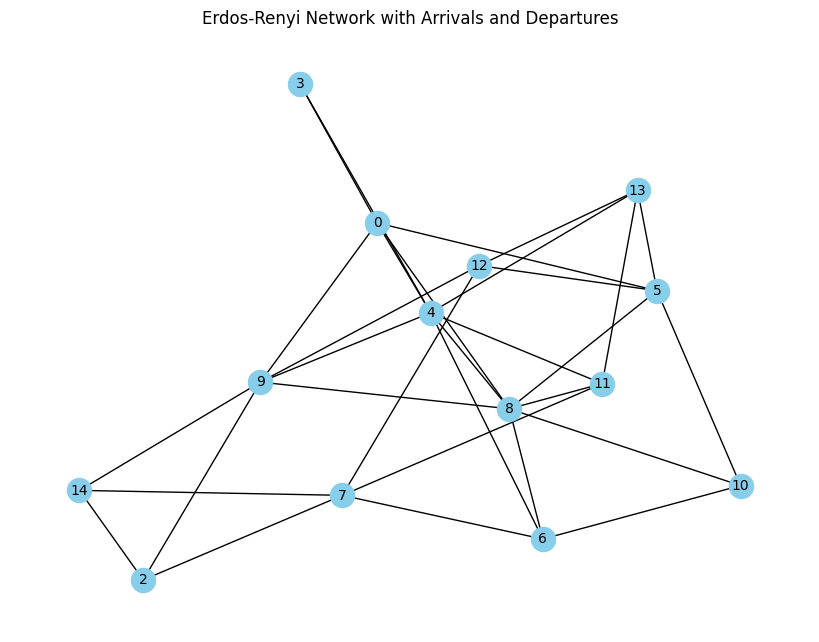

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_erdos_renyi_with_arrivals_and_departures(num_initial_nodes, num_new_nodes, edge_prob, departure_prob):
    # Create an empty graph
    G = nx.Graph()
    
    # Add initial nodes to the graph
    G.add_nodes_from(range(num_initial_nodes))
    
    # Add edges to the graph with given probability
    for i in range(num_initial_nodes):
        for j in range(i + 1, num_initial_nodes):
            if random.random() < edge_prob:
                G.add_edge(i, j)
    
    # Generate new nodes and add them to the graph
    new_nodes = range(num_initial_nodes, num_initial_nodes + num_new_nodes)
    G.add_nodes_from(new_nodes)
    
    # Add edges between new nodes and existing nodes with given probability
    for new_node in new_nodes:
        for existing_node in G.nodes():
            if random.random() < edge_prob:
                G.add_edge(new_node, existing_node)
    
    # Determine nodes that depart based on departure probability
    departing_nodes = [node for node in G.nodes() if random.random() < departure_prob]
    G.remove_nodes_from(departing_nodes)
    
    return G

# Example parameters
num_initial_nodes = 10
num_new_nodes = 5
edge_prob = 0.3  # Probability of edge creation between nodes
departure_prob = 0.1  # Probability of node departure

# Generate Erdos-Renyi graph with arrivals and departures
erdos_renyi_with_arrivals_and_departures = generate_erdos_renyi_with_arrivals_and_departures(
    num_initial_nodes, num_new_nodes, edge_prob, departure_prob)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(erdos_renyi_with_arrivals_and_departures, with_labels=True, node_size=300, node_color='skyblue', font_size=10)
plt.title("Erdos-Renyi Network with Arrivals and Departures")
plt.show()